In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [105]:
X = pd.read_csv("X.csv")
y = pd.read_csv("updrs_1.csv")

In [106]:
X

,visit_month,SSNTYTLTDVRR,LSINTHPSQKPLSITVR,TNFDNDIALVR,TKKQELSEAEQATR,EYC(UniMod_4)GVPGDGDEELLR,KVPQVSTPTLVEVSR,ANAGKPKDPTFIPAPIQAK,LSPEDYTLK,YIFHNFMER,...,TLEAQLTPR,LDIDSPPITAR,DFADIPNLR,SGINC(UniMod_4)PIQK,FNKNNEGTYYSPNYNPQSR,NILDRQDPPSVVVTSHQAPGEK,ALMSPAGMLR,MYLGYEYVTAIR,SLGSPSGEVSHPR,NFPPSQDASGDLYTTSSQLTLPATQC(UniMod_4)LAGK
0,0,0.00,323331.0,59948.0,30741.1,100126.0,66333900.0,333139.0,0.0,0.00,...,68400.4,0.0,119742.0,0.0,107954.0,51475.60,27653.7,393058.0,47510.8,66056.10
1,12,0.00,495344.0,79517.2,0.0,95360.4,73059300.0,429328.0,49257.4,0.00,...,82498.8,0.0,80273.7,0.0,137556.0,73044.60,33180.9,1823380.0,70286.1,31547.60
2,18,0.00,431585.0,87819.4,170214.0,99196.1,64711200.0,594508.0,55087.6,13527.10,...,70308.5,0.0,92871.0,93738.3,131897.0,54881.00,42782.1,2904670.0,70395.8,18709.00
3,12,0.00,383097.0,65732.0,0.0,125571.0,71652400.0,720563.0,67730.5,25189.90,...,92266.5,21867.4,133327.0,0.0,134920.0,64750.40,39383.0,3042050.0,82841.1,222024.00
4,24,0.00,701519.0,86270.5,101970.0,131592.0,123897000.0,255558.0,85754.8,19992.00,...,66311.1,29174.6,159582.0,0.0,120811.0,27149.70,40951.0,2508030.0,85578.6,149822.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,24,6327.89,664349.0,47980.4,109771.0,176905.0,99846400.0,607463.0,27116.0,16691.00,...,81630.8,12470.4,57315.9,58137.0,125974.0,107583.00,22222.2,6197780.0,103125.0,139656.00
1064,12,8128.11,320858.0,57747.0,0.0,99562.7,70888500.0,371732.0,34888.2,5054.96,...,79351.4,0.0,99881.1,73197.2,122237.0,0.00,20170.3,2457590.0,59025.6,10262.70
1065,24,0.00,592485.0,50427.5,130148.0,93483.3,71995500.0,116278.0,37437.2,18973.20,...,79460.3,12128.7,78533.4,61812.9,154073.0,9883.75,20366.4,2734010.0,56894.5,9137.12
1066,48,0.00,413726.0,55693.9,165415.0,106055.0,70658500.0,469498.0,40487.6,24314.20,...,81776.4,14592.7,115551.0,71239.5,138117.0,46140.80,23781.7,2245860.0,70061.5,32142.60


In [107]:
y

,updrs_1
0,3.0
1,4.0
2,2.0
3,3.0
4,4.0
...,...
1063,11.0
1064,5.0
1065,2.0
1066,2.0


In [108]:
def smape(y_true, y_pred):
    y_pred = y_pred.flatten()
    y_true = np.array(y_true.values).flatten()
    smap = np.zeros(len(y_true))
    
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    
    pos_ind = (y_true != 0)|(y_pred != 0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]
    
    return 100 * np.mean(smap)

In [111]:
def evaluate_model(model_df, i, model_name, model, X, y, X_test, y_test):
    """
    this function is for regression takes the model with the data and calculate
    the scores, with cross validation techniques, in addition to MAE, MSE, RMSE, MAPE
    R Squared and Adjusted R Squared

    :param model: model
    :param X_train, X_test, y_train, y_test: data that was used
    """

    # cross validation with 5 folds
    all_cv_5 = cross_val_score(model, X, y, cv=5, scoring=smape)
    print("all CV 5: {}".format(all_cv_5))
    # print("Mean Cross-Validation score: {}".format(all_cv_5.mean()))

    # predictions from our model
    predictions = model.predict(X_test)


    # calculating R squared and Adjusted R squared
    r_sqre = r2_score(y_test, predictions)
    n = len(y_test)
    p = X_test.shape[1] # number of independant features

    Adj_r2 = 1 - ((1 - r_sqre) * (n - 1) / (n - 1 - p))
    
    test_mae = mean_absolute_error(y_test, predictions)

    test_mse = mean_squared_error(y_test, predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions))

    smape_ = smape(y_test, predictions)
    print(smape_)

    
    model_df.loc[i] = [model_name, all_cv_5.mean(),
                    test_mae, mean_absolute_percentage_error(y_test, predictions),
                   test_mse, test_rmse, r_sqre, Adj_r2, smape_]

    return model_df

In [112]:
def plot_feature_importance(model, cols, model_name, slice=20):
    importances = model.feature_importances_
    feature_names = cols#X.columns#selected_features_X.columns #

    # Create a pandas DataFrame with the feature importances
    df = pd.DataFrame({"feature": feature_names, "importance": importances})

    # Sort the DataFrame by importance score
    df = df.sort_values("importance", ascending=False).reset_index(drop=True)

    # Create a bar plot using Seaborn
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    sns.barplot(x="importance", y="feature", data=df[:slice])
    plt.title("Top 20 Feature Importances {}".format(model_name))
    plt.ylabel("Feature Name")
    plt.xlabel("Importance")
    plt.show()

In [113]:
def train_and_evalute(X, y, metric):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

    print("Shape of X_train: {} \t Shape of y_train: {}".format(X_train.shape, y_train.shape))
    print("Shape of X_test: {} \t Shape of y_test: {}".format(X_test.shape, y_test.shape))

    # Building pipelins of standard scaler and model for varios regressors.

    lr = LinearRegression()

    lasso = Lasso()

    dt = DecisionTreeRegressor()

    rf = LinearRegression()

    xgb = XGBRegressor()

    gbr = GradientBoostingRegressor()

    eln = ElasticNet()

    br = BayesianRidge()

    cat = CatBoostRegressor(allow_writing_files=False, verbose=0, task_type="GPU")

    lgbm = LGBMRegressor()


    # List of all the pipelines
    pipelines = [lr, lasso, dt, rf, xgb, gbr,
                eln, br, cat, lgbm] # 

    # Dictionary of pipelines and model types for ease of reference
    ml_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest", 4: "XGBRegressor", 5: "GradientBoostingRegressor",
                    6: "Elastic Net", 7:"BayesianRidge", 8: "CatBoostRegressor", 9: "LGBMRegressor"}
        #, 

    models_scores_df = pd.DataFrame(columns=["model", "Mean CV", "MAE",
                                            "MAPE", "MSE", "RMSE", "R_Squared", "Adjusted_R_Squared", "SMAPE"])


    # Fit the pipelines and display the scores with Cross validation
    for i, pipe in enumerate(pipelines):
        # getting the name of our model
        model_name = ml_dict[i]
        print(model_name)
        
        # fitting our data
        pipe.fit(X_train, y_train)
        
        evaluate_model(models_scores_df, i, model_name, pipe, X, y, X_test, y_test)


    # selecting top 3 score based on metric
    filtered_models_scores_df =  models_scores_df.sort_values(metric).iloc[:3, :]

    for i in filtered_models_scores_df.index:
        plot_feature_importance(pipelines[i],  X.columns, ml_dict[i])

    return models_scores_df

In [114]:
np.array([[22], [22]]).flatten()

array([22, 22])

Shape of X_train: (854, 944) 	 Shape of y_train: (854, 1)
Shape of X_test: (214, 944) 	 Shape of y_test: (214, 1)
LinearRegression
all CV 5: [nan nan nan nan nan]
135.0115313986861
Lasso
all CV 5: [nan nan nan nan nan]
75.01346582912785
DecisionTree
all CV 5: [nan nan nan nan nan]
91.34199788086335
RandomForest
all CV 5: [nan nan nan nan nan]
135.0115313986861
XGBRegressor
all CV 5: [nan nan nan nan nan]
69.26258756983115
GradientBoostingRegressor
all CV 5: [nan nan nan nan nan]
70.81639137197308
Elastic Net
all CV 5: [nan nan nan nan nan]
74.86854886693706
BayesianRidge
all CV 5: [nan nan nan nan nan]
74.17137721320205
CatBoostRegressor
all CV 5: [nan nan nan nan nan]
68.84267018068235
LGBMRegressor
all CV 5: [nan nan nan nan nan]
68.6182485078578


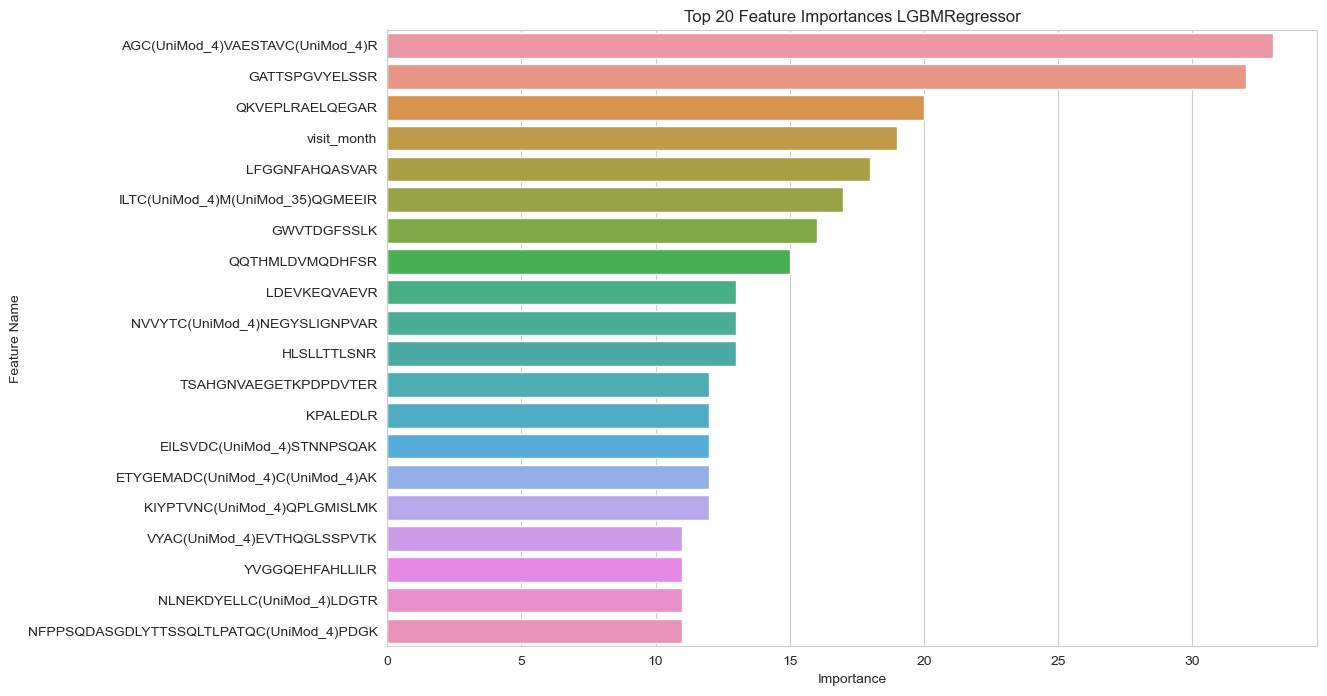

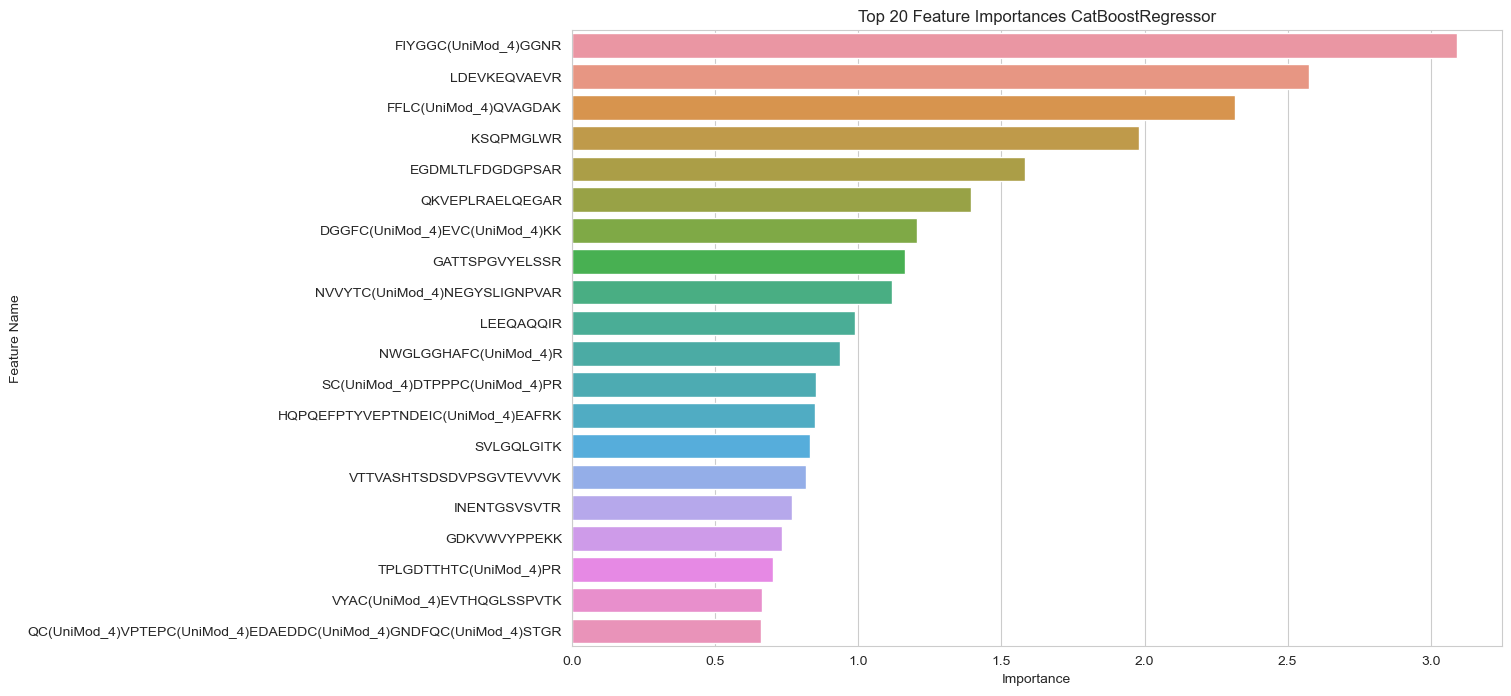

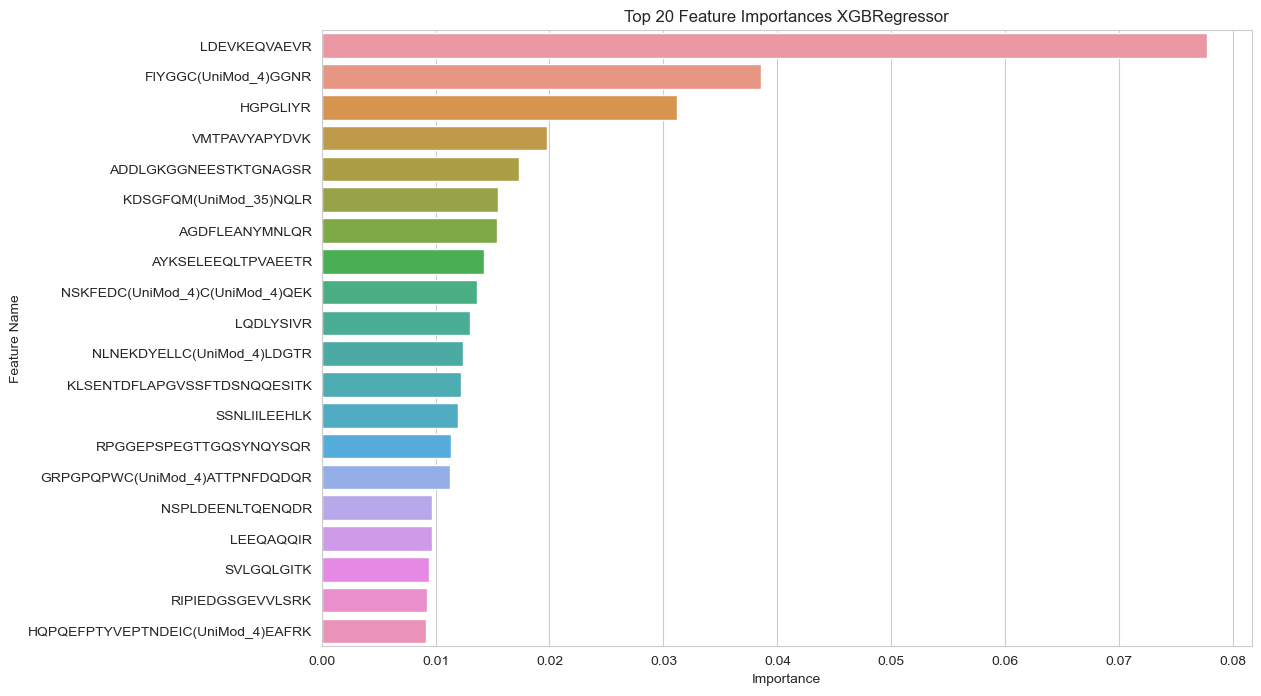

In [115]:
models_scores_df = train_and_evalute(X, y, metric="SMAPE")

In [116]:
models_scores_df

,model,Mean CV,MAE,MAPE,MSE,RMSE,R_Squared,Adjusted_R_Squared,SMAPE
0,LinearRegression,NaN,13.022984,4.470200e+15,290.038097,17.030505,-12.183589,4.841456,135.011531
1,Lasso,NaN,3.987960,2.117972e+15,23.201070,4.816749,-0.054597,1.307290,75.013466
2,DecisionTree,NaN,5.182243,2.041351e+15,46.070093,6.787495,-1.094101,1.610183,91.341998
3,RandomForest,NaN,13.022984,4.470200e+15,290.038097,17.030505,-12.183589,4.841456,135.011531
4,XGBRegressor,NaN,3.583471,1.788226e+15,20.121805,4.485733,0.085370,1.266506,69.262588
5,GradientBoostingRegressor,NaN,3.667278,1.873157e+15,20.291252,4.504581,0.077668,1.268751,70.816391
6,Elastic Net,NaN,3.953539,2.030483e+15,22.671523,4.761462,-0.030527,1.300277,74.868549
7,BayesianRidge,NaN,3.748694,1.719362e+15,20.317033,4.507442,0.076496,1.269092,74.171377
8,CatBoostRegressor,NaN,3.414317,1.678989e+15,17.382263,4.169204,0.209895,1.230222,68.842670
9,LGBMRegressor,NaN,3.524692,1.829192e+15,19.511887,4.417226,0.113093,1.258428,68.618249


In [117]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [118]:
import tensorflow as tf


In [119]:
class Custom_CE_Loss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, y_true, y_pred):        
        y_pred = tf.reshape(y_pred, [-1]) # flatten y_pred
        y_true = tf.reshape(y_true, [-1]) # flatten y_true
        
        num = tf.abs(y_true - y_pred)
        dem = ((tf.abs(y_true) + tf.abs(y_pred)) / 2)
        
        pos_ind = tf.math.logical_or(y_true != 0, y_pred != 0)
        smap = tf.where(pos_ind, num / dem, tf.zeros_like(num))
        
        return 100 * tf.reduce_mean(smap)

In [120]:

model = tf.keras.Sequential([

tf.keras.layers.Dense(256, input_shape=[X.shape[1]]),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(128),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(64),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(32),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(8),
tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=Custom_CE_Loss())

In [121]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=2)

Epoch 1/300
27/27 - 0s - loss: 147.1334 - val_loss: 151.5653
Epoch 2/300
27/27 - 0s - loss: 142.9043 - val_loss: 141.4478
Epoch 3/300
27/27 - 0s - loss: 142.9966 - val_loss: 143.3227
Epoch 4/300
27/27 - 0s - loss: 135.7603 - val_loss: 142.9810
Epoch 5/300
27/27 - 0s - loss: 140.0510 - val_loss: 144.7953
Epoch 6/300
27/27 - 0s - loss: 142.6669 - val_loss: 147.9472
Epoch 7/300
27/27 - 0s - loss: 140.0683 - val_loss: 137.8525
Epoch 8/300
27/27 - 0s - loss: 136.6934 - val_loss: 145.6738
Epoch 9/300
27/27 - 0s - loss: 136.1393 - val_loss: 121.8481
Epoch 10/300
27/27 - 0s - loss: 131.3881 - val_loss: 140.2874
Epoch 11/300
27/27 - 0s - loss: 125.2942 - val_loss: 126.7984
Epoch 12/300
27/27 - 0s - loss: 132.2022 - val_loss: 129.6545
Epoch 13/300
27/27 - 0s - loss: 131.1093 - val_loss: 127.7878
Epoch 14/300
27/27 - 0s - loss: 124.4818 - val_loss: 119.0881
Epoch 15/300
27/27 - 0s - loss: 122.3669 - val_loss: 114.1553
Epoch 16/300
27/27 - 0s - loss: 124.4685 - val_loss: 119.9347
Epoch 17/300
27/2

In [122]:
def plot_learning_curve(model_history):
    """
    plotting the leanring curve of the model
    """
    
    plt.figure(figsize=(12, 8))
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(model_history.history['loss'], label='train')
    plt.plot(model_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

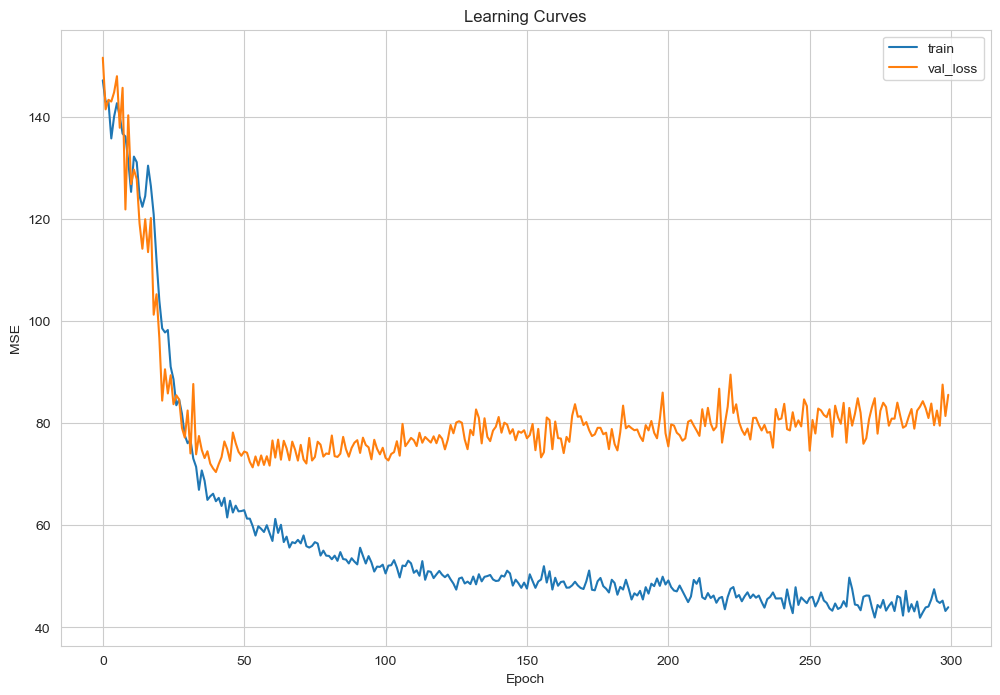

In [123]:
plot_learning_curve(history)

In [124]:
predictions = model.predict(X_test)

# Metrics
print("MAE: {}".format(mean_absolute_error(y_test, predictions)))
print("MSE: {}".format(mean_squared_error(y_test, predictions)))
print("RMSE: {}".format(mean_squared_error(y_test, predictions, squared=False)))
print("MAPE: {}".format(mean_absolute_percentage_error(y_test, predictions)))
print("R2: {}".format(r2_score(y_test, predictions)))
print("SMAPE: {}".format(smape(y_test, predictions)))

MAE: 4.509018749555695
MSE: 33.98458936143895
RMSE: 5.829630293718372
MAPE: 1662193750348274.8
R2: -0.5447586616064553
SMAPE: 85.55163984245155
